In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
df = pd.read_csv('C:/Users/umbac/Documents/Flatiron/Phase_2/project/bsc-phase-two-project/data/kc_house_data.csv')
df.condition.head()

0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#there was a '?' in the column so i replaced with nan
df['sqft_basement'].replace('?',np.nan,inplace=True)
#then made column floats
df['sqft_basement'] = df['sqft_basement'].astype(float)
#calcd mean
base_sqft_mean = df['sqft_basement'].mean()
#placed nans with mean
df['sqft_basement'].fillna(base_sqft_mean,inplace=True)
# df.sqft_basement.unique()

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#remove 0s in yr_rend
df['yr_renovated'].fillna(0,inplace=True)
df['waterfront'].fillna(0,inplace=True)
df['view'].fillna(0,inplace=True)


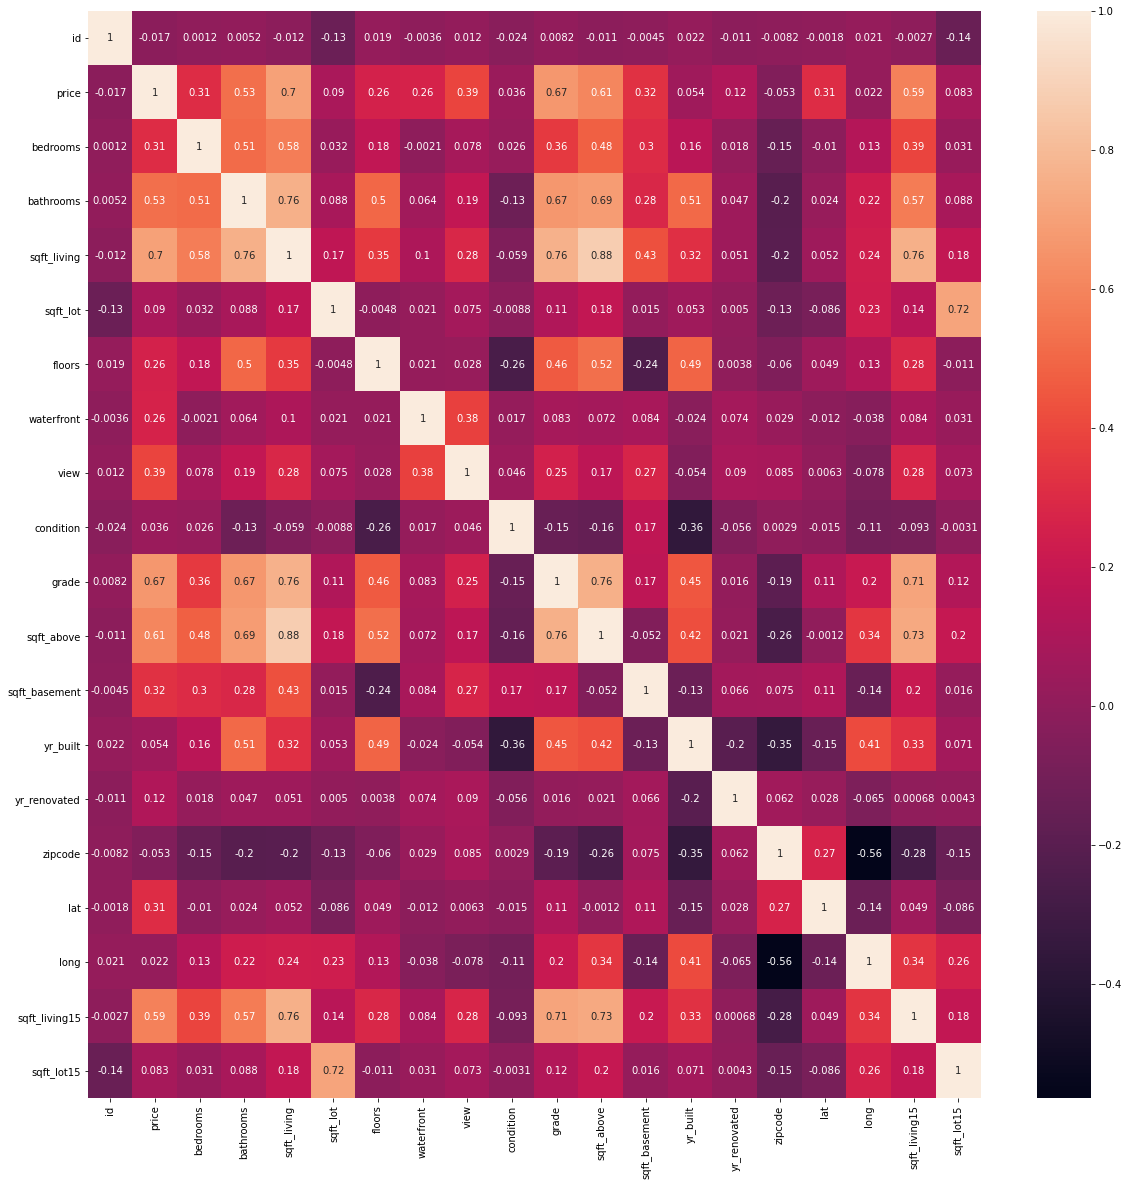

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot=True);

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# cors = ['sqft_living15','sqft_above','grade','view','sqft_living','bathrooms','bedrooms']

# plt.style.use('fivethirtyeight')
# for column_name in df.columns:
#     plt.subplots(figsize=(10,10))
#     plt.scatter(df[f'{column_name}'],'price',data=df)
#     plt.legend()
#     plt.ylabel('Price')
#     plt.xlabel(f'{column_name}')



Make a base model with bed/bath, sqft_living, grade

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [11]:
reg = LinearRegression()

In [12]:
#what are my categories?
categoricals = ['bedrooms','bathrooms','waterfront','floors','view','grade','condition','zipcode']
continuous = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']

df_cont = df[continuous]

log_names = ['f{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names

#normalize with mean centering
def norm(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(norm)



<ipython-input-12-11bfb370e25a>:8: RuntimeWarning: divide by zero encountered in log
  df_log = np.log(df_cont)
<ipython-input-12-11bfb370e25a>:8: RuntimeWarning: invalid value encountered in log
  df_log = np.log(df_cont)


In [13]:
df[categoricals]

,bedrooms,bathrooms,waterfront,floors,view,grade,condition,zipcode
0,3,1.00,0.0,1.0,0.0,7,3,98178
1,3,2.25,0.0,2.0,0.0,7,3,98125
2,2,1.00,0.0,1.0,0.0,6,3,98028
3,4,3.00,0.0,1.0,0.0,7,5,98136
4,3,2.00,0.0,1.0,0.0,8,3,98074
...,...,...,...,...,...,...,...,...
21592,3,2.50,0.0,3.0,0.0,8,3,98103
21593,4,2.50,0.0,2.0,0.0,8,3,98146
21594,2,0.75,0.0,2.0,0.0,7,3,98144
21595,3,2.50,0.0,2.0,0.0,8,3,98027


In [14]:
df_ohe = pd.get_dummies(df[categoricals])

preprocessed = pd.concat([df_cont, df_ohe],axis=1)

X = preprocessed.drop('price',axis=1)
y = preprocessed['price']

crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)
baseline = np.mean(cross_val_score(reg,X,y,scoring='r2',cv=crossvalidation))

baseline

0.6986664368170825

In [15]:
#Look at interactions
from itertools import combinations

In [16]:
preprocessed.columns
feat_combinations = combinations(X.columns,3)
len(list(feat_combinations))

816

In [17]:
# code to find top interactions by R^2 value here
interactions = []
feat_combinations = combinations(X.columns,2)

data = X.copy()
for i, (a,b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(reg,data,y,scoring='r2',cv=crossvalidation,n_jobs=16))
    if score > baseline:
        interactions.append((a,b,round(score,3)))
        
    if i % 50 == 0:
        print(i)
        
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True))

0
50
100
150
Top 3 interactions: [('sqft_living', 'grade', 0.736), ('bathrooms', 'grade', 0.729), ('sqft_living', 'bathrooms', 0.724), ('sqft_above', 'grade', 0.724), ('sqft_above', 'bathrooms', 0.722), ('sqft_living', 'sqft_above', 0.721), ('sqft_basement', 'grade', 0.718), ('sqft_living', 'sqft_living15', 0.715), ('sqft_living', 'waterfront', 0.715), ('sqft_above', 'sqft_basement', 0.714), ('sqft_living', 'view', 0.713), ('sqft_above', 'waterfront', 0.713), ('sqft_above', 'view', 0.711), ('sqft_basement', 'sqft_living15', 0.711), ('sqft_living15', 'bathrooms', 0.711), ('view', 'grade', 0.711), ('sqft_living', 'sqft_basement', 0.71), ('sqft_living', 'lat', 0.71), ('sqft_living15', 'waterfront', 0.71), ('sqft_basement', 'bathrooms', 0.709), ('lat', 'grade', 0.709), ('sqft_living15', 'view', 0.709), ('sqft_living15', 'grade', 0.709), ('bedrooms', 'grade', 0.709), ('bathrooms', 'waterfront', 0.709), ('bathrooms', 'view', 0.709), ('sqft_above', 'sqft_living15', 0.708), ('sqft_living', 'be

In [18]:
# code to find top interactions by R^2 value here
interactions = []
feat_combinations = combinations(X.columns,2)

data = X.copy()
for i, (a,b) in enumerate(feat_combinations):
    data['interaction'] = data[a] / data[b]
    score = np.mean(cross_val_score(reg,data,y,scoring='r2',cv=crossvalidation,n_jobs=16))
    if score > baseline:
        interactions.append((a,b,round(score,3)))
        
    if i % 50 == 0:
        print(i)
        
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
Top 3 interactions: [('sqft_living', 'grade', 0.73), ('yr_built', 'grade', 0.716), ('sqft_above', 'grade', 0.715)]


In [19]:
# code to find top interactions by R^2 value here
interactions = []
feat_combinations = combinations(X.columns,2)

data = X.copy()
for i, (a,b) in enumerate(feat_combinations):
    data['interaction'] = data[a]**2 + data[b]*0
    score = np.mean(cross_val_score(reg,data,y,scoring='r2',cv=crossvalidation,n_jobs=16))
    if score > baseline:
        interactions.append((a,round(score,3)))
        
    if i % 50 == 0:
        print(i)
        
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[1], reverse=True)[:3])

0
50
100
150
Top 3 interactions: [('sqft_living', 0.721), ('sqft_living', 0.721), ('sqft_living', 0.721)]
